<h1>Diabetes Prediction Project</h1>

<h3>Data Wrangling</h3>

In [1]:
# import pandas library
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


*The height column should be updated

In [3]:
#df.info()
df = df.set_index("patient_number")

In [4]:
df.replace("?", np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 390
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cholesterol      390 non-null    int64 
 1   glucose          390 non-null    int64 
 2   hdl_chol         390 non-null    int64 
 3   chol_hdl_ratio   390 non-null    object
 4   age              390 non-null    int64 
 5   gender           390 non-null    object
 6   height           390 non-null    int64 
 7   weight           390 non-null    int64 
 8   bmi              390 non-null    object
 9   systolic_bp      390 non-null    int64 
 10  diastolic_bp     390 non-null    int64 
 11  waist            390 non-null    int64 
 12  hip              390 non-null    int64 
 13  waist_hip_ratio  390 non-null    object
 14  diabetes         390 non-null    object
dtypes: int64(10), object(5)
memory usage: 48.8+ KB


There is no null value

In [5]:
df.describe(include='all')

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
count,390.000000,390.000000,390.000000,390,390.000000,390,390.000000,390.000000,390,390.000000,390.000000,390.000000,390.000000,390,390
unique,NaN,NaN,NaN,69,NaN,2,NaN,NaN,193,NaN,NaN,NaN,NaN,39,2
top,NaN,NaN,NaN,"3,6",NaN,female,NaN,NaN,"30,1",NaN,NaN,NaN,NaN,"0,9",No diabetes
freq,NaN,NaN,NaN,15,NaN,228,NaN,NaN,9,NaN,NaN,NaN,NaN,28,330
mean,207.230769,107.338462,50.266667,NaN,46.774359,NaN,65.951282,177.407692,NaN,137.133333,83.289744,37.869231,42.992308,NaN,NaN
std,44.666005,53.798188,17.279069,NaN,16.435911,NaN,3.918867,40.407824,NaN,22.859528,13.498192,5.760947,5.664342,NaN,NaN
min,78.000000,48.000000,12.000000,NaN,19.000000,NaN,52.000000,99.000000,NaN,90.000000,48.000000,26.000000,30.000000,NaN,NaN
25%,179.000000,81.000000,38.000000,NaN,34.000000,NaN,63.000000,150.250000,NaN,122.000000,75.000000,33.000000,39.000000,NaN,NaN
50%,203.000000,90.000000,46.000000,NaN,44.500000,NaN,66.000000,173.000000,NaN,136.000000,82.000000,37.000000,42.000000,NaN,NaN
75%,229.000000,107.750000,59.000000,NaN,60.000000,NaN,69.000000,200.000000,NaN,148.000000,90.000000,41.000000,46.000000,NaN,NaN


<h4>Convert object column to integer data types</h3>

In [6]:
df[['chol_hdl_ratio','bmi','waist_hip_ratio']] = \
 df[['chol_hdl_ratio','bmi','waist_hip_ratio']].astype("str").replace(',','.',regex=True)
df[['chol_hdl_ratio','bmi','waist_hip_ratio']].head(3)

,chol_hdl_ratio,bmi,waist_hip_ratio
patient_number,,,
1,3.9,22.5,0.84
2,3.6,26.4,0.83
3,4,29.3,0.89


In [7]:
#df.info()

In [8]:
df[['chol_hdl_ratio','bmi','waist_hip_ratio']] = df[['chol_hdl_ratio','bmi','waist_hip_ratio']].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 390
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cholesterol      390 non-null    int64  
 1   glucose          390 non-null    int64  
 2   hdl_chol         390 non-null    int64  
 3   chol_hdl_ratio   390 non-null    float64
 4   age              390 non-null    int64  
 5   gender           390 non-null    object 
 6   height           390 non-null    int64  
 7   weight           390 non-null    int64  
 8   bmi              390 non-null    float64
 9   systolic_bp      390 non-null    int64  
 10  diastolic_bp     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  waist_hip_ratio  390 non-null    float64
 14  diabetes         390 non-null    object 
dtypes: float64(3), int64(10), object(2)
memory usage: 48.8+ KB


In [9]:
df.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
patient_number,,,,,,,,,,,,,,,
1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes


<h4>Try binning for BMI column

Text(0.5, 1.0, 'bmi bins')

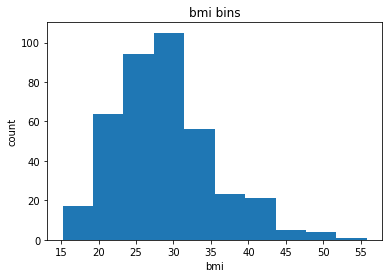

In [10]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
#plot histgram for bmi
plt.pyplot.hist(df["bmi"])

# set x/y labels and plot title
plt.pyplot.xlabel("bmi")
plt.pyplot.ylabel("count")
plt.pyplot.title("bmi bins")

In [11]:
group_names = ['Underweight','Healthy','Overweight','Obese']
bins = np.array([0,18.5, 25, 30,  max(df["bmi"])])
bins

array([ 0. , 18.5, 25. , 30. , 55.8])

In [12]:
df['bmi-binned'] = pd.cut(df['bmi'], bins, labels=group_names, include_lowest=True )
df[['bmi','bmi-binned']].head(10)

,bmi,bmi-binned
patient_number,,
1,22.5,Healthy
2,26.4,Overweight
3,29.3,Overweight
4,19.6,Healthy
5,20.2,Healthy
6,27.6,Overweight
7,21.0,Healthy
8,19.7,Healthy
9,24.9,Healthy


In [13]:
df['bmi-binned'].value_counts().sort_values(ascending=True)

Underweight      9
Healthy        111
Overweight     122
Obese          148
Name: bmi-binned, dtype: int64

In [14]:
df['bmi-binned'].head()

patient_number
1       Healthy
2    Overweight
3    Overweight
4       Healthy
5       Healthy
Name: bmi-binned, dtype: category
Categories (4, object): ['Underweight' < 'Healthy' < 'Overweight' < 'Obese']

Text(0.5, 1.0, 'BMI')

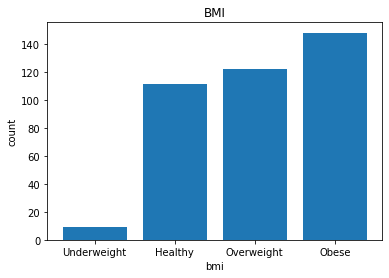

In [15]:
#plot bar chart for bmi
pyplot.bar(group_names, df["bmi-binned"].value_counts().sort_values(ascending=True)) #

# set x/y labels and plot title
plt.pyplot.xlabel("bmi")
plt.pyplot.ylabel("count")
plt.pyplot.title("BMI")

In [16]:
df.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes,bmi-binned
patient_number,,,,,,,,,,,,,,,,
1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes,Healthy
2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes,Overweight
3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes,Overweight
4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes,Healthy
5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes,Healthy


<h4> Make dummy variables for column 'gender', 'bmi' , 'diabetes'

In [17]:
dummy_variable_1 = pd.get_dummies(df["gender"])
dummy_variable_1.head(3)

,female,male
patient_number,,
1,1,0
2,1,0
3,1,0


In [18]:
dummy_variable_1.rename(columns={'female':'gender-female', 'male':'gender-male'}, inplace=True)
dummy_variable_1.head()

,gender-female,gender-male
patient_number,,
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0


In [19]:
#concat the dummy to the dataframe df
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "gender" from "df"
df.drop("gender", axis = 1, inplace=True)

In [20]:
#Second way of converting categorical to numerical variable
df['bmi-binned'].replace(to_replace=group_names, value=[0,1,2,3],inplace=True)
#df.head(3)

In [21]:
df['diabetes'].value_counts()

No diabetes    330
Diabetes        60
Name: diabetes, dtype: int64

In [22]:
df['diabetes'].replace(to_replace=["Diabetes","No diabetes"], value=[1,0],inplace=True)
df.head(3)

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes,bmi-binned,gender-female,gender-male
patient_number,,,,,,,,,,,,,,,,,
1,193,77,49,3.9,19,61,119,22.5,118,70,32,38,0.84,0,1,1,0
2,146,79,41,3.6,19,60,135,26.4,108,58,33,40,0.83,0,2,1,0
3,217,75,54,4.0,20,67,187,29.3,110,72,40,45,0.89,0,2,1,0


In [23]:
#drop unnecessary coulumns
df.drop(['bmi',], axis = 1, inplace=True)

In [24]:
df.rename(columns={'height':'weight', 'weight':'height'}, inplace=True)
#df.head(3)

In [25]:
df.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,weight,height,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes,bmi-binned,gender-female,gender-male
patient_number,,,,,,,,,,,,,,,,
1,193,77,49,3.9,19,61,119,118,70,32,38,0.84,0,1,1,0
2,146,79,41,3.6,19,60,135,108,58,33,40,0.83,0,2,1,0
3,217,75,54,4.0,20,67,187,110,72,40,45,0.89,0,2,1,0
4,226,97,70,3.2,20,64,114,122,64,31,39,0.79,0,1,1,0
5,164,91,67,2.4,20,70,141,122,86,32,39,0.82,0,1,1,0


In [26]:
df.groupby(['bmi-binned'])['diabetes'].value_counts(normalize=True)

bmi-binned  diabetes
0           0           1.000000
1           0           0.918919
            1           0.081081
2           0           0.827869
            1           0.172131
3           0           0.797297
            1           0.202703
Name: diabetes, dtype: float64

In [27]:
df.groupby(['gender-male'])['diabetes'].value_counts(normalize=True)

gender-male  diabetes
0            0           0.850877
             1           0.149123
1            0           0.839506
             1           0.160494
Name: diabetes, dtype: float64

<h3>EDA</h3>

In [28]:
df.corr()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,weight,height,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes,bmi-binned,gender-female,gender-male
cholesterol,1.000000,0.158102,0.193162,0.475927,0.247333,-0.063601,0.062359,0.207741,0.166241,0.134038,0.093364,0.091847,0.204262,0.111247,0.030139,-0.030139
glucose,0.158102,1.000000,-0.158302,0.282210,0.294392,0.098052,0.190358,0.162777,0.020262,0.222336,0.138223,0.185117,0.689080,0.145889,-0.093372,0.093372
hdl_chol,0.193162,-0.158302,1.000000,-0.681867,0.028210,-0.087238,-0.291883,0.031807,0.078342,-0.276697,-0.223837,-0.158777,-0.123133,-0.268484,0.108305,-0.108305
chol_hdl_ratio,0.475927,0.282210,-0.681867,1.000000,0.163201,0.081162,0.278812,0.115505,0.038242,0.313262,0.208902,0.243329,0.272987,0.269051,-0.102938,0.102938
age,0.247333,0.294392,0.028210,0.163201,1.000000,-0.082229,-0.056784,0.453417,0.068649,0.150585,0.004675,0.275188,0.301995,0.016601,-0.084177,0.084177
weight,-0.063601,0.098052,-0.087238,0.081162,-0.082229,1.000000,0.255389,-0.040704,0.043617,0.057447,-0.095906,0.252548,0.023466,-0.249782,-0.677876,0.677876
height,0.062359,0.190358,-0.291883,0.278812,-0.056784,0.255389,1.000000,0.097497,0.166477,0.847766,0.826985,0.250461,0.162987,0.735959,-0.092053,0.092053
systolic_bp,0.207741,0.162777,0.031807,0.115505,0.453417,-0.040704,0.097497,1.000000,0.603662,0.210934,0.155321,0.137871,0.198600,0.122544,-0.035417,0.035417
diastolic_bp,0.166241,0.020262,0.078342,0.038242,0.068649,0.043617,0.166477,0.603662,1.000000,0.165846,0.143898,0.077918,0.049351,0.112694,-0.071043,0.071043
waist,0.134038,0.222336,-0.276697,0.313262,0.150585,0.057447,0.847766,0.210934,0.165846,1.000000,0.835177,0.514177,0.223378,0.719269,0.045955,-0.045955


In [29]:
import seaborn as sns
df.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,weight,height,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes,bmi-binned,gender-female,gender-male
patient_number,,,,,,,,,,,,,,,,
1,193,77,49,3.9,19,61,119,118,70,32,38,0.84,0,1,1,0
2,146,79,41,3.6,19,60,135,108,58,33,40,0.83,0,2,1,0
3,217,75,54,4.0,20,67,187,110,72,40,45,0.89,0,2,1,0
4,226,97,70,3.2,20,64,114,122,64,31,39,0.79,0,1,1,0
5,164,91,67,2.4,20,70,141,122,86,32,39,0.82,0,1,1,0


In [30]:
#sns.regplot(x="glucose", y="diabetes", data=df)

<h4>Categorical variable visualisation</h4>

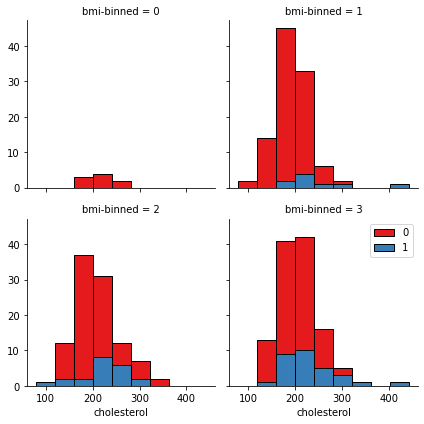

In [31]:
bins = np.linspace(df.cholesterol.min(), df.cholesterol.max(), 10)
g = sns.FacetGrid(df, col="bmi-binned", hue="diabetes", palette="Set1", col_wrap=2)
g.map(plt.pyplot.hist, 'cholesterol', bins=bins, ec="k")

g.axes[-1].legend()
plt.pyplot.show()

Obese and Overweight person more vulnerable to diabetes with uniform cholestrol distribution

In [32]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['glucose'], df['diabetes'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6890795038664441  with a P-value of P = 3.2051186585278832e-56


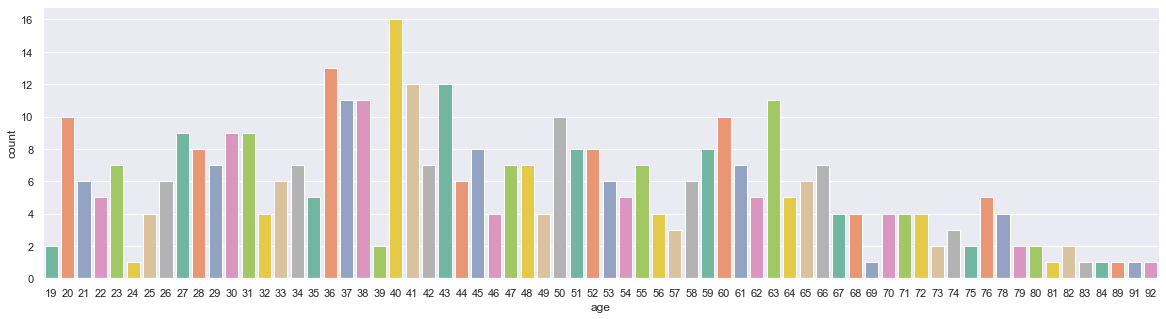

In [33]:
# 그래프의 사이즈를 조절합니다.
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style='darkgrid')
ax = sns.countplot(x='age', data=df, palette="Set2")

Most data comes from age 35-40

C:\Users\Azrai Mahadan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Azrai Mahadan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Azrai Mahadan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

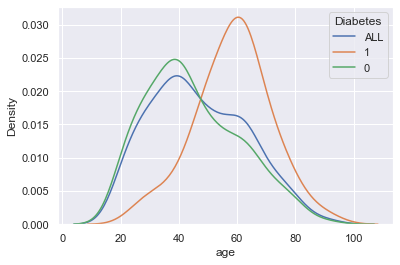

In [34]:
sns.distplot(df['age'], hist=False, label='ALL')
sns.distplot(df[df['diabetes']==1]['age'], hist=False, label='1')
sns.distplot(df[df['diabetes']==0]['age'], hist=False, label='0')

plt.legend(title='Diabetes')
plt.show()

Middle-age(50-70) person are more vulnerable to diabetes

In [35]:
print(df['gender-male'].value_counts().sort_index().values)
print(df[df['diabetes']==1]['gender-male'].value_counts().sort_index().values)

[228 162]
[34 26]


Make sure integer have no string

In [36]:
#df[df['diabetes']==1]['bmi-binned']

In [37]:
def multiplot(columns):
    df_multi = pd.DataFrame({'ALL': df[columns].value_counts().sort_index().values,
                          'Pos': df[df['diabetes']==1][columns].value_counts().sort_index().values,
                          'Neg': df[df['diabetes']==0][columns].value_counts().sort_index().values
                          }, index=df[columns].value_counts().sort_index().index)

    df_multi.plot(kind='bar')
    plt.legend(title='Diabetes')
    plt.show()

In [38]:
#multiplot('bmi-binned')

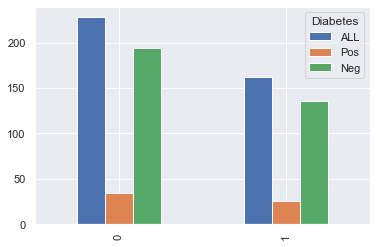

In [39]:
multiplot('gender-male')

Female(0) is slightly have higher possibilities to have diabetes but not significant

<h4>Numerical variables visualisation</h4>

In [40]:
df.head(3)

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,weight,height,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes,bmi-binned,gender-female,gender-male
patient_number,,,,,,,,,,,,,,,,
1,193,77,49,3.9,19,61,119,118,70,32,38,0.84,0,1,1,0
2,146,79,41,3.6,19,60,135,108,58,33,40,0.83,0,2,1,0
3,217,75,54,4.0,20,67,187,110,72,40,45,0.89,0,2,1,0


{'whiskers': [<matplotlib.lines.Line2D at 0x218738e65e0>,
 'caps': [<matplotlib.lines.Line2D at 0x218738e6eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x218738db730>],
 'medians': [<matplotlib.lines.Line2D at 0x2187389cbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2187389cb20>],
 'means': []}

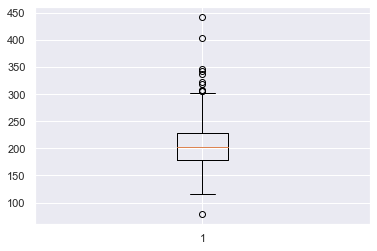

In [41]:
plt.boxplot(df['cholesterol'])

<AxesSubplot:xlabel='diabetes', ylabel='cholesterol'>

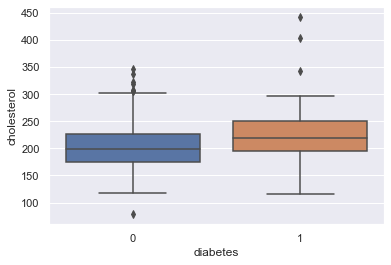

In [42]:
sns.boxplot(x='diabetes', y='cholesterol', data=df)

More cholestrol more vulnerable to diabetes

<AxesSubplot:xlabel='diabetes', ylabel='glucose'>

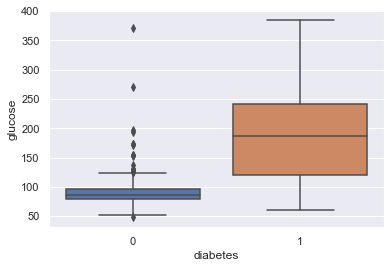

In [43]:
sns.boxplot(x='diabetes', y='glucose', data=df)

Obviously high glucose = high possibilities diabetes</br>
An important feature

<AxesSubplot:xlabel='diabetes', ylabel='hdl_chol'>

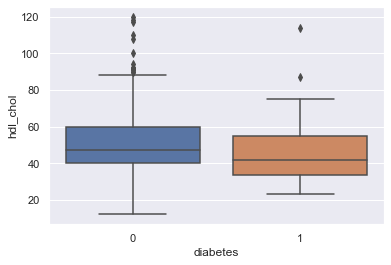

In [44]:
sns.boxplot(x='diabetes', y='hdl_chol', data=df)

<AxesSubplot:xlabel='diabetes', ylabel='chol_hdl_ratio'>

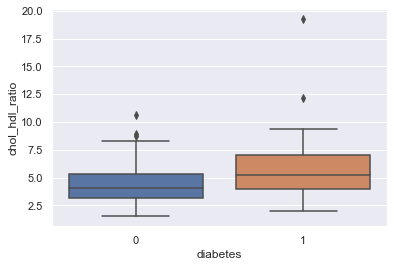

In [45]:
sns.boxplot(x='diabetes', y='chol_hdl_ratio', data=df)

<AxesSubplot:xlabel='diabetes', ylabel='waist_hip_ratio'>

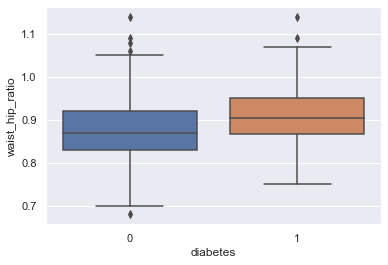

In [46]:
sns.boxplot(x='diabetes', y='waist_hip_ratio', data=df)

<h3>Model Development</h3>

In [47]:
x = df.drop(columns = ['diabetes']).to_numpy()
x

array([[193.,  77.,  49., ...,   1.,   1.,   0.],
       [146.,  79.,  41., ...,   2.,   1.,   0.],
       [217.,  75.,  54., ...,   2.,   1.,   0.],
       ...,
       [301.,  90., 118., ...,   1.,   1.,   0.],
       [232., 184., 114., ...,   1.,   1.,   0.],
       [165.,  94.,  69., ...,   3.,   1.,   0.]])

In [48]:
y = df['diabetes'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [49]:
from sklearn import preprocessing
x= preprocessing.StandardScaler().fit(x).transform(x)
x

array([[-0.31901328, -0.5646553 , -0.07340058, ..., -1.20770934,
         0.84292723, -0.84292723],
       [-1.37261932, -0.52743157, -0.5369832 , ..., -0.05610386,
         0.84292723, -0.84292723],
       [ 0.21899831, -0.60187902,  0.21633855, ..., -0.05610386,
         0.84292723, -0.84292723],
       ...,
       [ 2.10203888, -0.32270108,  3.92499948, ..., -1.20770934,
         0.84292723, -0.84292723],
       [ 0.55525555,  1.42681407,  3.69320817, ..., -1.20770934,
         0.84292723, -0.84292723],
       [-0.94669348, -0.24825362,  1.08555596, ...,  1.09550163,
         0.84292723, -0.84292723]])

In [50]:
from sklearn.model_selection import train_test_split

# sklearn에서 제공하는 train_test_split을 사용하여 손 쉽게 분리 할 수 있습니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [51]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정 모델 class를 가져 옵니다.
# max_iter는 로지스틱 알고리즘의 반복 횟수를 조정하는 파라미터로 본 실습에서는 default 값으로는 모자르기에 아래와 같이 설정함
model = DecisionTreeClassifier()

# fit 함수를 사용하여 데이터를 학습합니다.
model.fit(x_train, y_train)

# score 함수를 사용하여 모델의 성능을 출력합니다.
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.8589743589743589


Use various ML algoritm to train the model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


models = []
models.append(('LR', LogisticRegression(max_iter =5000))) # 로지스틱 분류기 
models.append(('LDA', LinearDiscriminantAnalysis()))  # LDA 모델
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('NB', GaussianNB()))  # 가우시안 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

for name, model in models:
    model.fit(x_train, y_train)
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

LR - train_score : 0.923077, test score : 0.910256
LDA - train_score : 0.929487, test score : 0.910256
KNN - train_score : 0.916667, test score : 0.871795
NB - train_score : 0.910256, test score : 0.910256
RF - train_score : 1.000000, test score : 0.923077
SVM - train_score : 0.939103, test score : 0.923077
[23:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB - train_score : 1.000000, test score : 0.897436


C:\Users\Azrai Mahadan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


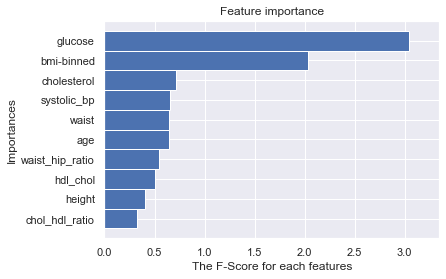

In [53]:
max_num_features = 10
ax = xgb.plot_importance(models[-1][1], height = 1, grid = True, importance_type = 'gain', show_values = False, max_num_features = max_num_features)

ytick = ax.get_yticklabels()
feature_importance = []
for i in range(max_num_features):
    feature_importance.append(df.drop(columns=['diabetes']).columns[int(ytick[i].get_text().split('f')[1])])

ax.set_yticklabels(feature_importance)

plt.rcParams['figure.figsize'] = (10, 15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

In [54]:
#Use KNN model 
from sklearn import metrics

Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh_model = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh_model.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.88461538, 0.84615385, 0.88461538, 0.87179487, 0.87179487,
       0.85897436, 0.87179487, 0.84615385, 0.84615385, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.83333333, 0.84615385,
       0.83333333, 0.84615385, 0.84615385, 0.84615385, 0.83333333,
       0.84615385, 0.84615385, 0.84615385, 0.83333333, 0.83333333,
       0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
       0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
       0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
       0.83333333, 0.83333333, 0.83333333, 0.82051282, 0.82051282,
       0.82051282, 0.82051282, 0.82051282, 0.82051282])

Text(0, 0.5, 'Cross-Validated Accuracy')

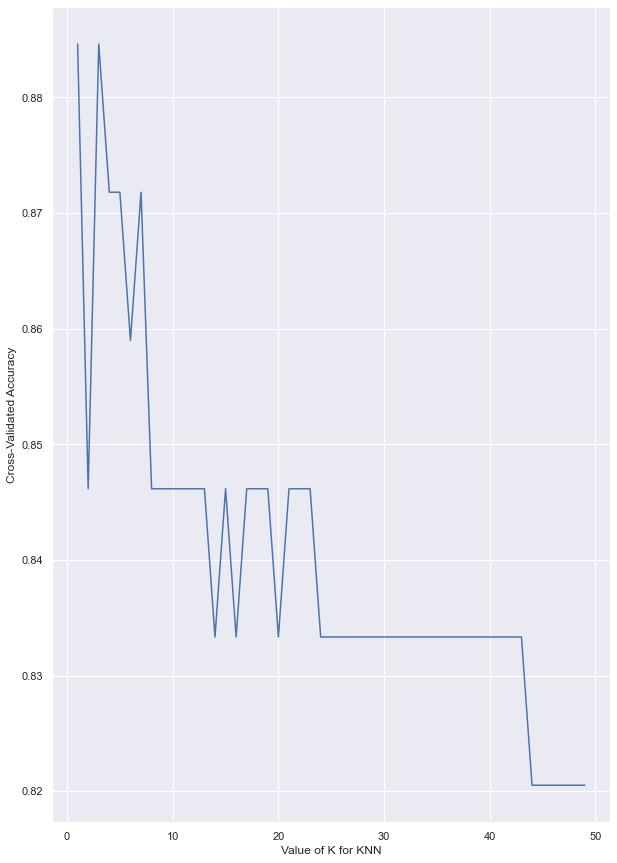

In [55]:
k_range = range(1, Ks)
plt.plot(k_range, mean_acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [56]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8846153846153846 with k= 1


K=1 maybe lead to overfit and make the model sensitive to outliers and noise

#### Model Tuning
To prevent overfitting

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# 성능 비교에 필요한 모델 파라미터들을 정의합니다.
parameters = dict(n_neighbors=k_range)

# 5개의 fold를 구성합니다.
cv = KFold(n_splits=5)
# 의사결정트리 모델을 튜닝하기 위하여 선언합니다.
DT = KNeighborsClassifier()

# 모델 튜닝을 우해서 GridSearchCV를 사용합니다.
DT_CV = GridSearchCV(DT, parameters, scoring = 'accuracy', cv = cv, n_jobs= -1)
# 학습을 수행합니다.
DT_CV.fit(x_train, y_train)

# 결과를 출력합니다.
print(DT_CV.score(x_train, y_train))
print(DT_CV.score(x_test, y_test))

0.8942307692307693
0.8589743589743589


In [58]:
DT_CV.best_params_

{'n_neighbors': 6}

In [59]:
# 가장 성능이 좋았던 파라미터로 수행한 모델을 저장합니다.
best_DT_CV = DT_CV.best_estimator_

# 가장 좋은 성능을 보여준 모델의 결과를 출력합니다.
best_DT_CV.score(x_test, y_test)

0.8589743589743589

#### Confusion matrix

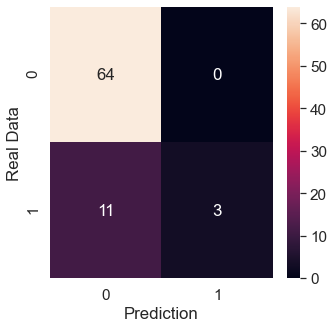

array([[64,  0],
       [11,  3]], dtype=int64)

In [60]:
from sklearn.metrics import confusion_matrix

model_prediction = best_DT_CV.predict(x_test)

# sklearn에서 제공하는 confusion_matrix를 사용합니다.
cm = confusion_matrix(y_test, model_prediction)

# 출력 파트 - seaborn의 heatmap을 사용
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
cm

In [61]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Recall score: {}".format(recall_score(y_test, model_prediction)))
print("Precision score: {}".format(precision_score(y_test, model_prediction)))

Recall score: 0.21428571428571427
Precision score: 1.0


Maybe there are some problems with imbalanced data

In [64]:
print("Avg F1-score: %.4f" % metrics.f1_score(y_test, model_prediction, average='weighted'))
print("Jaccard score: %.4f" % metrics.jaccard_score(y_test, model_prediction,pos_label=0))
print("Model's Accuracy: ", metrics.accuracy_score(y_test, model_prediction))

Avg F1-score: 0.8189
Jaccard score: 0.8533
Model's Accuracy:  0.8589743589743589
